## 考え方

### SQLite3 データベースへの接続
sqlite3.connect() でデータベースファイルを指定すると、データベースへの接続（sqlite3.Connection オブジェクト）を取得できます。 指定したデータベースファイルが存在しない場合は新規に作成されます。

In [1]:
import sqlite3

# Create a 'Connection' object.
conn = sqlite3.connect('sample.db')

### テーブルの作成
SQL コマンドを実行するには、Connection#cursor() により sqlite3.Cursor オブジェクトを作成し、execute() メソッドを呼び出します。 次の例では、データベースに新しいテーブル memo を作成しています。

In [2]:
# Create a 'Cursor' object from 'Connection' object.
cur = conn.cursor()

# Create a table
cur.execute('''CREATE TABLE memo
        (date TEXT, title TEXT, body TEXT)''')

### テーブルにレコードを追加
テーブルを作成するのと同様に、Cursor#execute() を使ってレコードを追加できます。

In [7]:
# Insert a record
cur.execute("""INSERT INTO memo
    VALUES('2007-01-01', 'Memo1', 'Body1')""")

DB-API の ? 文字によるパラメータ置換（プレースホルダ機能）を使えば、各列の値を保持したタプルを渡すことによってレコードを追加することができます。

In [5]:
for t in (('2007-01-01', 'Memo1', 'Body1'),
    ('2007-01-02', 'Memo2', 'Body2'),
    ('2007-01-03', 'Memo3', 'Body3')):
    cur.execute('INSERT INTO memo VALUES(?,?,?)', t)

一方で、以下のように % を使って SQL クエリ文字列を作成してしまうと、SQL インジェクション攻撃に対して脆弱性が残ってしまう可能性が高いので、DB-API の ? を使ったパラメータ置換を行うようにしたほうが安全です。

コミットと終了

In [8]:
# コミット
conn.commit()
 
# コネクションをクローズ
conn.close()

## 確認の仕方
VScodeのsqliteのプラグインを適用して、見る
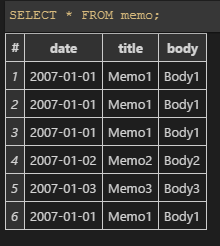

In [6]:
! code .

## タプルの追加

In [2]:
a=7974

In [3]:
t=()

In [4]:
# a=str(a)

In [5]:
a

7974

In [6]:
t += (a,)

In [7]:
t

(7974,)

## pandasで読み込み

In [8]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('foo.sqlite3')
df = pd.DataFrame(columns=["col1", "col2"])
df["col1"] = ["hoge"]
df["col2"] = [1234]
# 出力
print(df)
df.to_sql("table1", conn, index=False, if_exists='replace')

# 読み込み
df2 = pd.read_sql_query('select * from {}'.format('table1'), conn)
print(df2)

   col1  col2
0  hoge  1234


   col1  col2
0  hoge  1234
